<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU45_Planificación y promoción del destino en base a los patrones en origen de los turistas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.- EDA - Exploratory Data Analysis Analysis</font>

## <font color='steelblue'>Tasks</font>

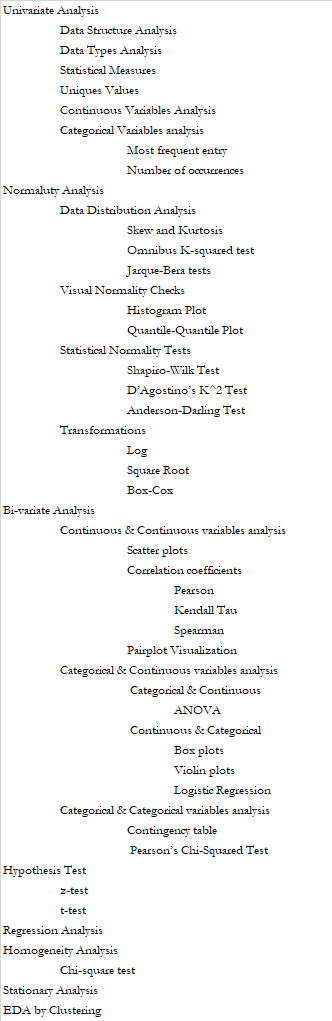
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_45_08_03_turismo_receptor.csv</font>
- <font color='steelblue'> <b>Sampled Input File: CU_45_07_03_turismo_receptor.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

## <font color='green'>Settings</font>

### Libraries to use

In [3]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(ggplot2)
library(summarytools)
library(GGally)
library(nortest)
library(lubridate)


### Paths

In [4]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [49]:
iFile <- "CU_45_08_03_turismo_receptor.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_45_08_03_turismo_receptor.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [50]:
data <- read_csv(file_data)

Rows: 50294 Columns: 9
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): mes, pais_orig_cod, pais_orig, mun_dest, CMUN
dbl (3): mun_dest_cod, turistas, Target
lgl (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Structure

Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 50,294
Columns: 8
$ mes           <chr> "2019-07", "2019-07", "2019-07", "2019-07", "2019-07", "…
$ pais_orig_cod <chr> "000", "010", "011", "030", "110", "121", "123", "126", …
$ pais_orig     <chr> "Total", "Total Europa", "Total Unión Europea", "Total A…
$ mun_dest_cod  <dbl> 28002, 28002, 28002, 28002, 28002, 28002, 28002, 28002, …
$ mun_dest      <chr> "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "…
$ turistas      <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …
$ CMUN          <chr> "002", "002", "002", "002", "002", "002", "002", "002", …
$ Target        <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …


Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,Target
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2019-07,000,Total,28002,Ajalvir,338,002,338
2019-07,010,Total Europa,28002,Ajalvir,290,002,290
2019-07,011,Total Unión Europea,28002,Ajalvir,268,002,268
2019-07,030,Total América,28002,Ajalvir,37,002,37
2019-07,110,Francia,28002,Ajalvir,56,002,56


**Tamaño de Memoria** de los datos

In [9]:
object.size(data)

3266976 bytes

**Structure of non-numerical features**

In [10]:
# Display non-numerical features
data |> select(where(~ !is.numeric(.x))) |> freq()

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
2019-07,1530,3.042112,3.042112,3.042112,3.042112
2019-08,1603,3.187259,6.229371,3.187259,6.229371
2019-09,1545,3.071937,9.301308,3.071937,9.301308
2019-10,1506,2.994393,12.295701,2.994393,12.295701
2019-11,1432,2.847258,15.142959,2.847258,15.142959
2019-12,1469,2.920826,18.063785,2.920826,18.063785
2020-01,1490,2.962580,21.026365,2.962580,21.026365
2020-02,1349,2.682228,23.708593,2.682228,23.708593
2020-03,1227,2.439655,26.148248,2.439655,26.148248
2020-04,816,1.622460,27.770708,1.622460,27.770708


**Structure of numerical features**

In [11]:
data |> select(where(is.numeric)) |> descr()


,mun_dest_cod,Target,turistas
Mean,2.810040e+04,1.053161e+03,1.053161e+03
Std.Dev,1.244046e+02,1.129686e+04,1.129686e+04
Min,2.800200e+04,3.000000e+01,3.000000e+01
Q1,2.804700e+04,5.100000e+01,5.100000e+01
Median,2.807900e+04,9.900000e+01,9.900000e+01
Q3,2.812900e+04,2.540000e+02,2.540000e+02
Max,2.890300e+04,5.363690e+05,5.363690e+05
MAD,6.375180e+01,8.747340e+01,8.747340e+01
IQR,8.200000e+01,2.030000e+02,2.030000e+02
CV,4.427147e-03,1.072661e+01,1.072661e+01


## Data Types

**Tipo** de datos

In [12]:
sapply(data, class)
glimpse(data)

mes pais_orig_cod     pais_orig  mun_dest_cod      mun_dest 
  "character"   "character"   "character"     "numeric"   "character" 
     turistas          CMUN        Target 
    "numeric"   "character"     "numeric"

Rows: 50,294
Columns: 8
$ mes           <chr> "2019-07", "2019-07", "2019-07", "2019-07", "2019-07", "…
$ pais_orig_cod <chr> "000", "010", "011", "030", "110", "121", "123", "126", …
$ pais_orig     <chr> "Total", "Total Europa", "Total Unión Europea", "Total A…
$ mun_dest_cod  <dbl> 28002, 28002, 28002, 28002, 28002, 28002, 28002, 28002, …
$ mun_dest      <chr> "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "…
$ turistas      <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …
$ CMUN          <chr> "002", "002", "002", "002", "002", "002", "002", "002", …
$ Target        <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …


## Statistical Measures

In [13]:
data  |> descr()

,mun_dest_cod,Target,turistas
Mean,2.810040e+04,1.053161e+03,1.053161e+03
Std.Dev,1.244046e+02,1.129686e+04,1.129686e+04
Min,2.800200e+04,3.000000e+01,3.000000e+01
Q1,2.804700e+04,5.100000e+01,5.100000e+01
Median,2.807900e+04,9.900000e+01,9.900000e+01
Q3,2.812900e+04,2.540000e+02,2.540000e+02
Max,2.890300e+04,5.363690e+05,5.363690e+05
MAD,6.375180e+01,8.747340e+01,8.747340e+01
IQR,8.200000e+01,2.030000e+02,2.030000e+02
CV,4.427147e-03,1.072661e+01,1.072661e+01


## Uniques values

In [14]:
# Rthe number of unique values in each column.
data |> summarise(across(everything(), n_distinct))

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,Target
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
40,146,146,172,172,4103,172,4103


## CrossTab

<font color='tomato'>Select columns</font>

No Aplica

In [15]:
# data |> select(where(~ !is.numeric(.x))) |> colnames()
# Column1 <- "xxx"
# Column2 <- "yyy"

<font color='darkgrey'><b>Operation</font>

In [16]:
# Referencia cruzada de variables
# ctable(data[[Column1], data[[Column2]])

##	Analyzing Numerical Variables 

### Selecting continuous variables

In [17]:
# Numeric colums
cdata <- data |> select(where(is.numeric))

### Histograms

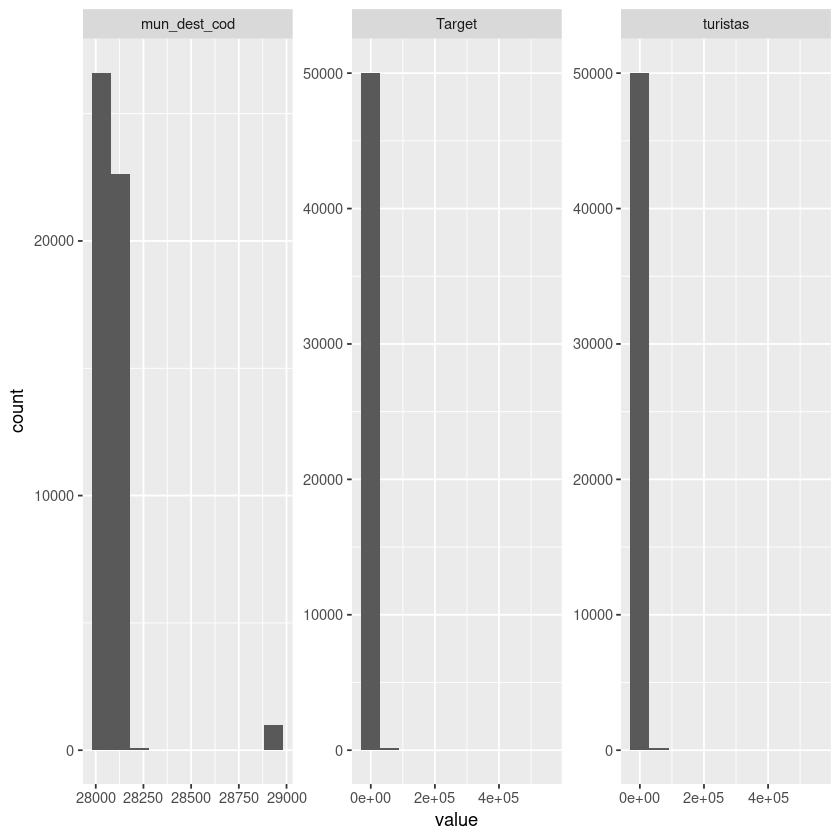

In [18]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~name, scales = "free")

### Box plot 

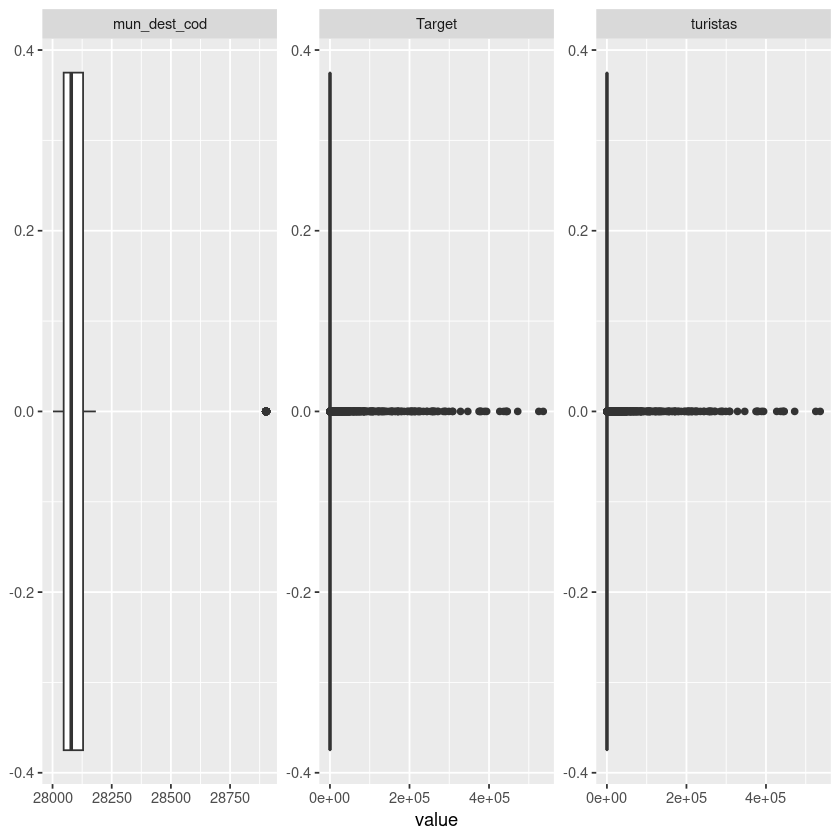

In [19]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_boxplot() +
  facet_wrap(~name, scales = "free")

### Violin plot 

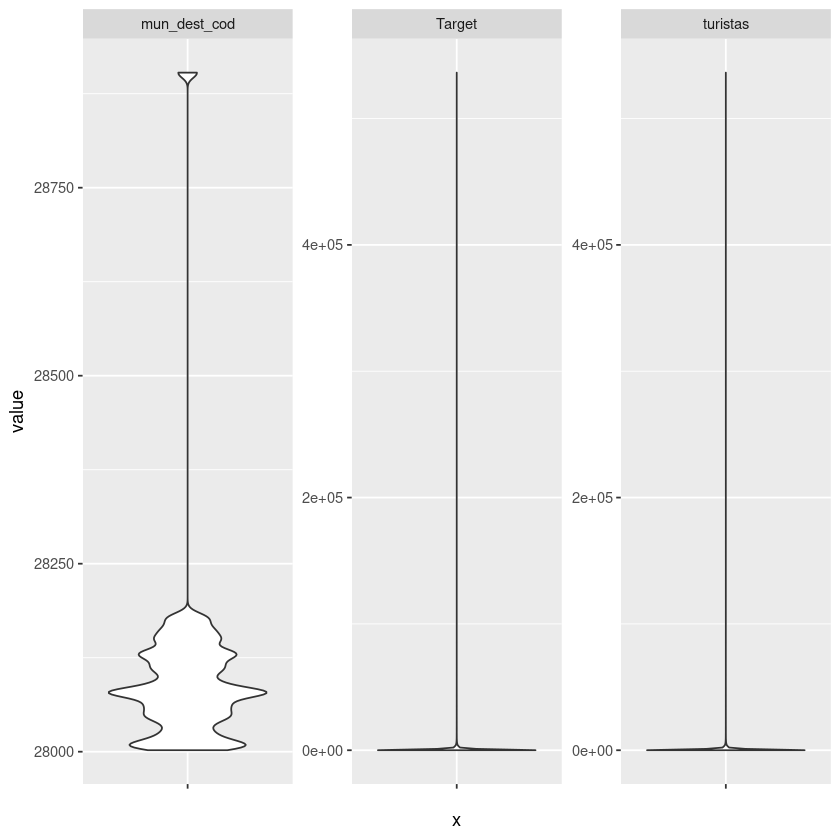

In [20]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = "", y = value)) +
  geom_violin() +
  facet_wrap(~name, scales = "free")

### Distribution plot 

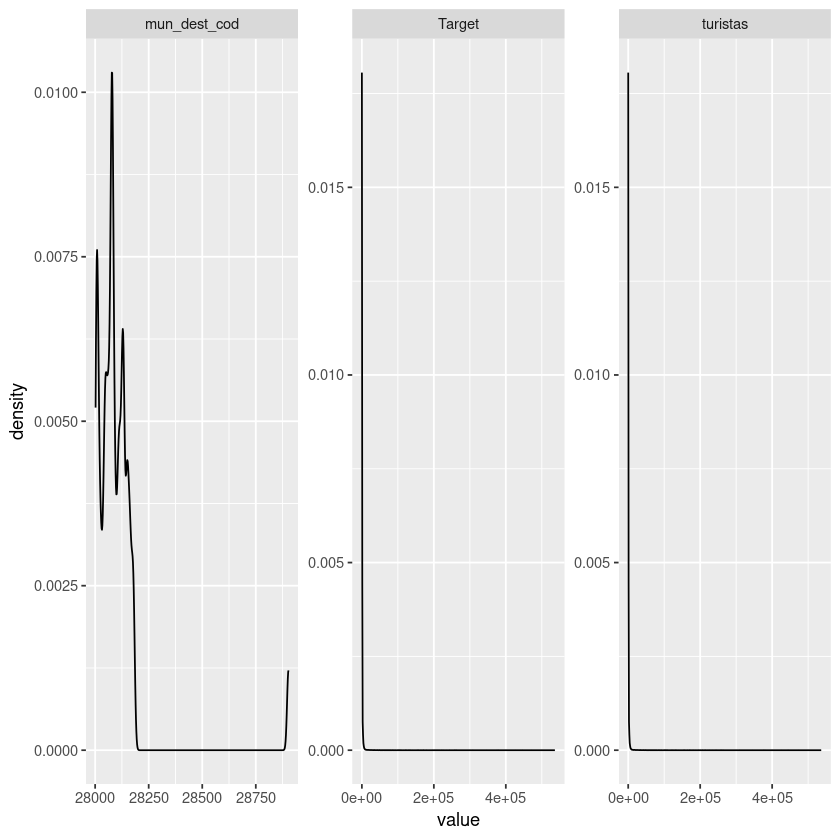

In [21]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_density() +
  facet_wrap(~name, scales = "free")

##	Analyzing Categorical Variables 

### Selecting categorical variables

In [22]:
# Category colums
char_cols <- data |> select(where(~ !is.numeric(.x))) |> colnames()
char_cols

[1] "mes"           "pais_orig_cod" "pais_orig"     "mun_dest"     
[5] "CMUN"

In [23]:
# Category colums
char_data <- data |> select(where(~ !is.numeric(.x))) 
char_data

mes,pais_orig_cod,pais_orig,mun_dest,CMUN
<chr>,<chr>,<chr>,<chr>,<chr>
2019-07,000,Total,Ajalvir,002
2019-07,010,Total Europa,Ajalvir,002
2019-07,011,Total Unión Europea,Ajalvir,002
2019-07,030,Total América,Ajalvir,002
2019-07,110,Francia,Ajalvir,002
2019-07,121,Países Bajos,Ajalvir,002
2019-07,123,Portugal,Ajalvir,002
2019-07,126,Alemania,Ajalvir,002
2019-07,000,Total,"Álamo, El",004


### Most frequent entry

* Ver salida de `summarytools::freq()` arriba

In [24]:
# Calculate and visualizate the ratio of the most frequent entry for each feature


### Visualization of categorical variables

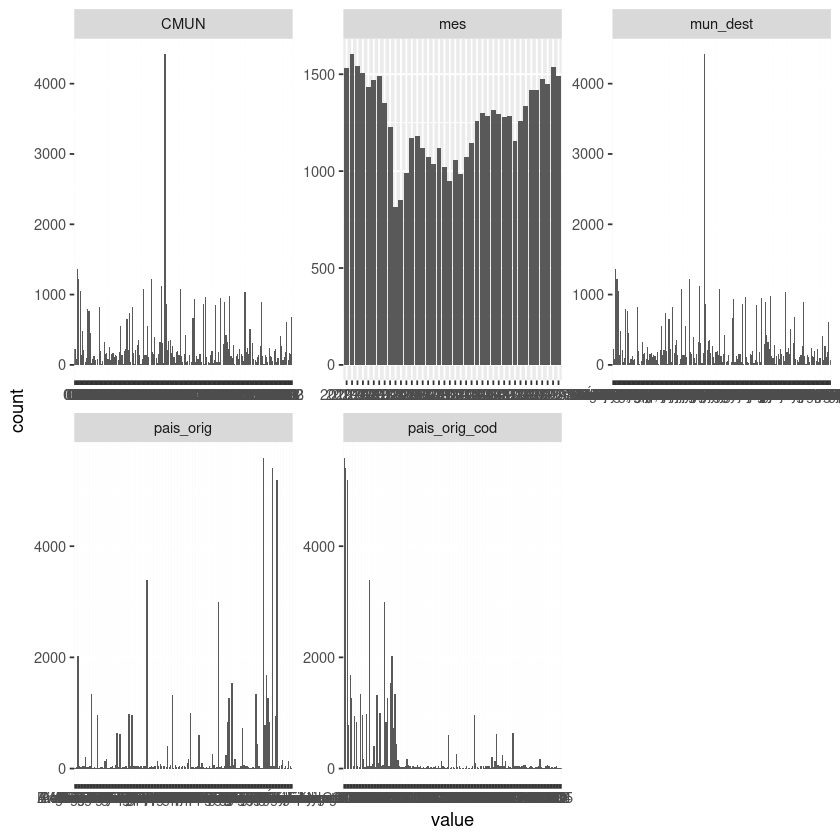

In [26]:
# returns a visualization of the number and frequency of categorical features
char_data |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_bar() +
  facet_wrap(~name, scales = "free")

## Statistical Normality Tests

In [27]:
cdata_long <- cdata |> 
  pivot_longer(cols = everything())

### Test de Anderson-Darling



In [28]:
tapply(cdata_long$value, cdata_long$name, ad.test)

$mun_dest_cod

	Anderson-Darling normality test

data:  X[[i]]
A = 5712.5, p-value < 2.2e-16


$Target

	Anderson-Darling normality test

data:  X[[i]]
A = 17161, p-value < 2.2e-16


$turistas

	Anderson-Darling normality test

data:  X[[i]]
A = 17161, p-value < 2.2e-16



### Test de Lilliefors



In [29]:
tapply(cdata_long$value, cdata_long$name, lillie.test)

$mun_dest_cod

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.23731, p-value < 2.2e-16


$Target

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.46392, p-value < 2.2e-16


$turistas

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.46392, p-value < 2.2e-16



### QQ-plots

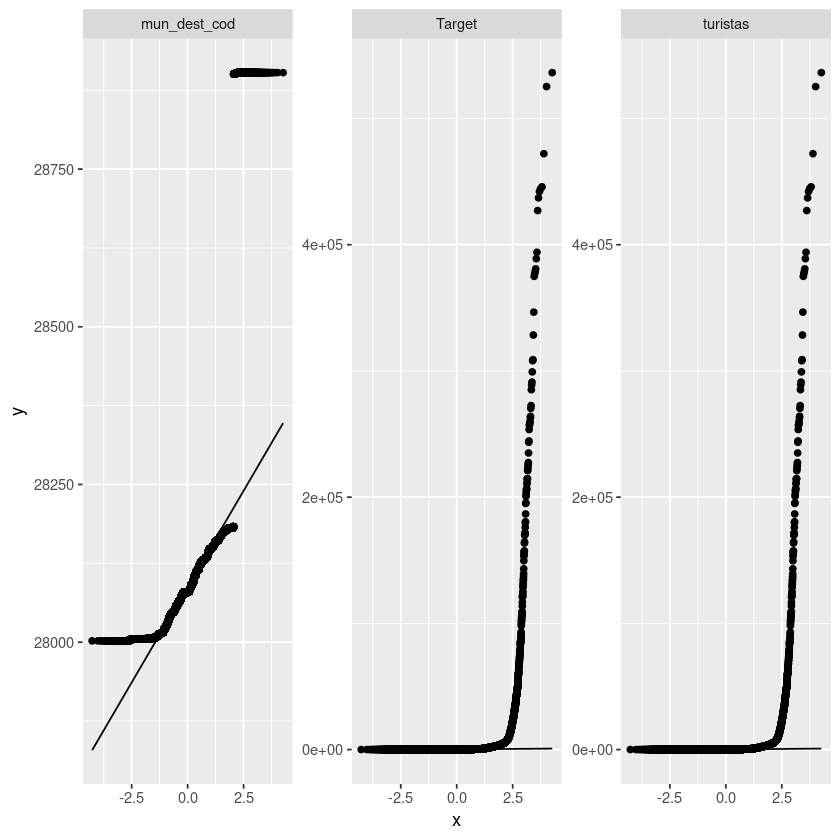

In [30]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(sample = value)) +
  geom_qq() +
  geom_qq_line() +
  facet_wrap(~name, scales = "free")

## Bivariate analysis

* Ver gráficos de dispersión y ggpairs arriba
* Completar si es necesario con alguna comparación específica (gráfico de dispersión o boxplot por grupos)

Correlaciones

In [31]:
cor(cdata, use = "pairwise.complete.obs")

,mun_dest_cod,turistas,Target
mun_dest_cod,1.00000000,-0.01279775,-0.01279775
turistas,-0.01279775,1.00000000,1.00000000
Target,-0.01279775,1.00000000,1.00000000


## Regression analysis

In [36]:
data

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,Target
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2019-07,000,Total,28002,Ajalvir,338,002,338
2019-07,010,Total Europa,28002,Ajalvir,290,002,290
2019-07,011,Total Unión Europea,28002,Ajalvir,268,002,268
2019-07,030,Total América,28002,Ajalvir,37,002,37
2019-07,110,Francia,28002,Ajalvir,56,002,56
2019-07,121,Países Bajos,28002,Ajalvir,54,002,54
2019-07,123,Portugal,28002,Ajalvir,37,002,37
2019-07,126,Alemania,28002,Ajalvir,40,002,40
2019-07,000,Total,28004,"Álamo, El",157,004,157


### Modelo completo regresión lineal simple

In [51]:
cdata_filtered <- data |>
    filter(is_train == TRUE) |>
    na.omit()

modelo <- lm(Target ~ ., data = cdata_filtered)
summary(modelo)


Call:
lm(formula = Target ~ ., data = cdata_filtered)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.917e-10  1.000e-13  3.000e-13  5.000e-13  7.369e-09 

Coefficients: (316 not defined because of singularities)
                                              Estimate Std. Error    t value
(Intercept)                                  1.209e-09  8.511e-10  1.420e+00
mes2019-08                                  -2.335e-13  1.476e-12 -1.580e-01
mes2019-09                                  -5.683e-13  1.503e-12 -3.780e-01
mes2019-10                                   1.292e-12  1.512e-12  8.540e-01
mes2019-11                                   1.023e-13  1.527e-12  6.700e-02
mes2019-12                                  -6.341e-13  1.523e-12 -4.160e-01
mes2020-01                                  -4.834e-13  1.507e-12 -3.210e-01
mes2020-02                                  -2.197e-12  1.553e-12 -1.414e+00
mes2020-03                                  -4.146e-12  1.591e-12 -2.6

Warning message:
“not plotting observations with leverage one:
  4903, 15214, 23294, 26869, 31579, 33197, 37631”


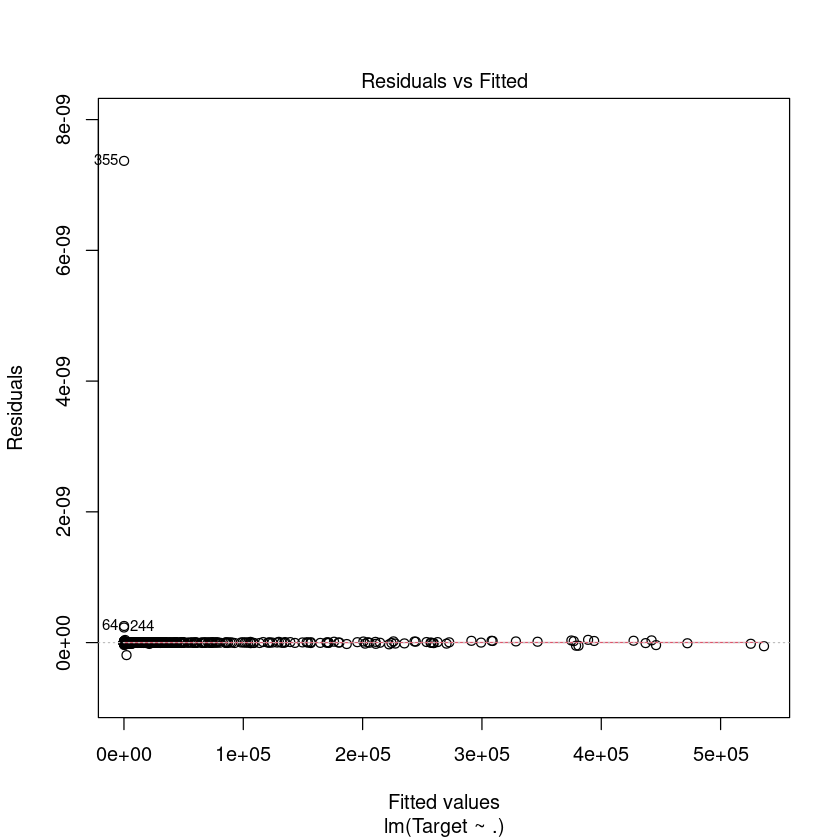

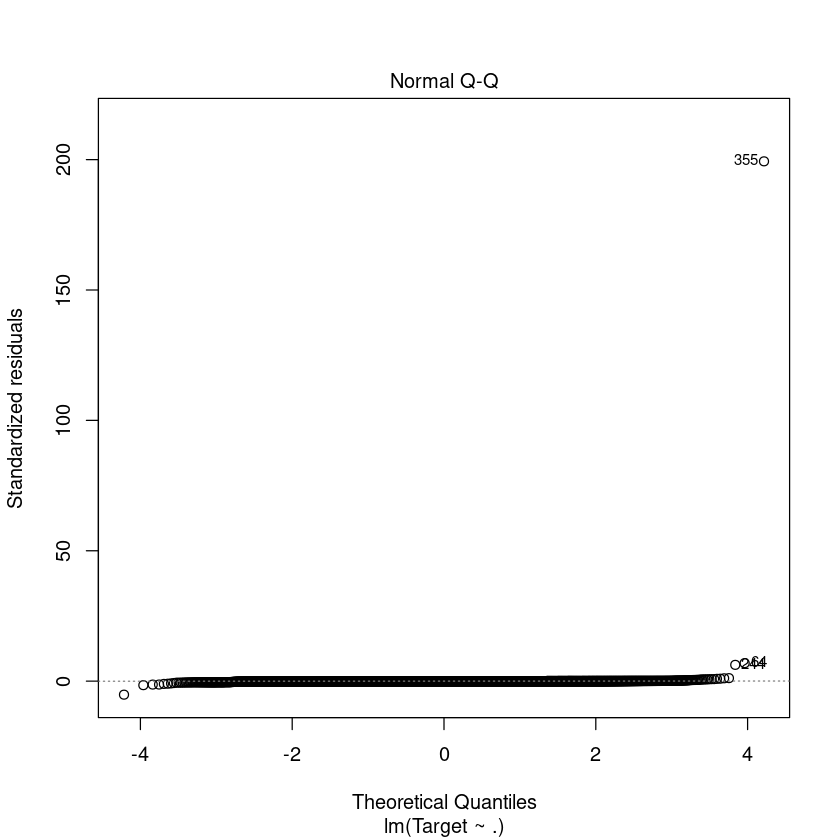

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


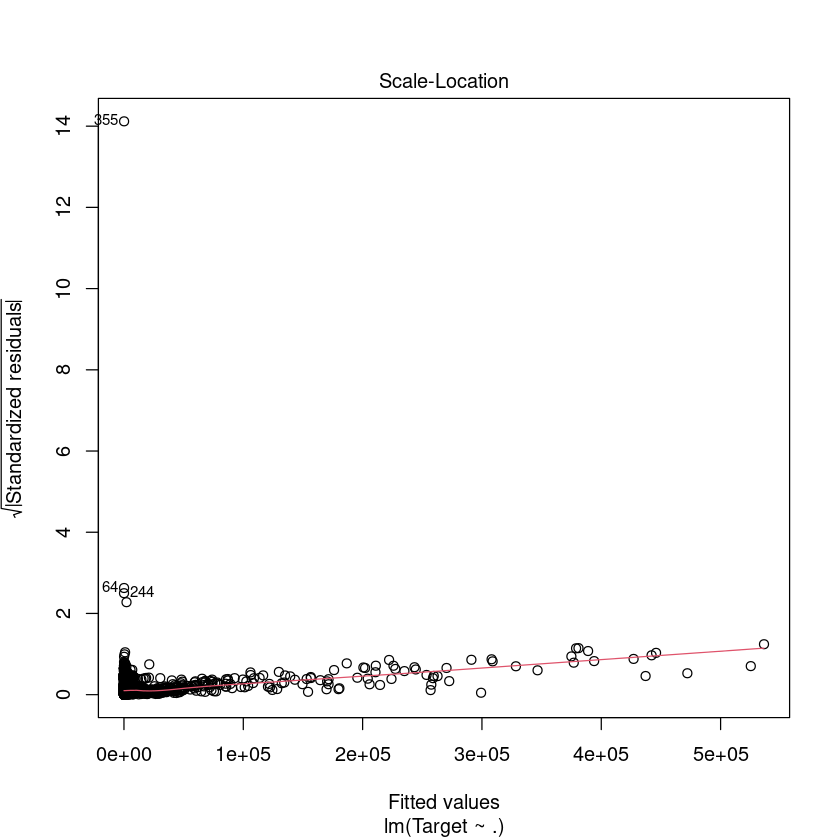

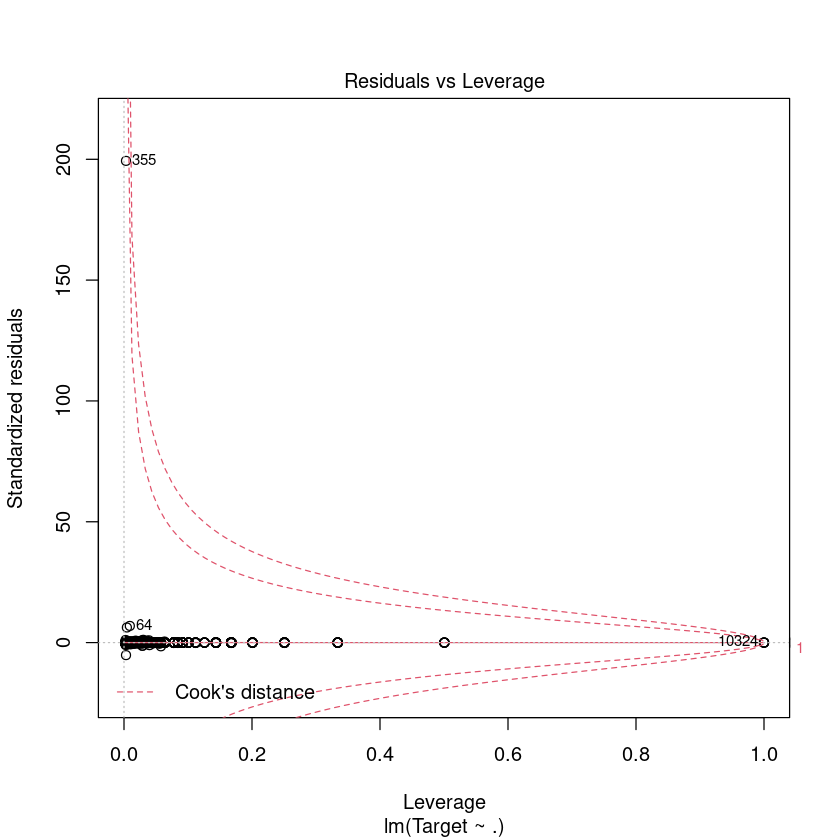

In [52]:
plot(modelo)

### Selección de variables

Este entrenamiento puede tardar mucho tiempo en completarse. En tal caso, ejecutar solo cuando sea realmente necesario.

In [53]:
modelo2 <- step(modelo, trace = FALSE)
summary(modelo2)


Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


## Stationary analysis

Este entrenamiento puede tardar mucho tiempo en completarse. En tal caso, ejecutar solo cuando sea realmente necesario.

- Si hay una variable fecha, usarla
- Si hay mes, o semana, convertir a fecha

In [ ]:
tsdata <- data |>
    mutate(fecha = as.Date(parse_date_time(paste(ano, semana, 1, sep="/"),'Y/W/w')))

In [ ]:
names(data)

Todas las series, probablemente habría que filtrar por geografía

In [ ]:
tsdata |> 
  mutate(across(c(n_vacunas, nombre_zona), as.character))
  pivot_longer(cols = n_vacunas:interes_gripe) |> 
  ggplot(aes(x = fecha, y = value)) +
  geom_line() +
  facet_wrap(~name, scales = "free")